# <center> Spam Detection with Machine Learning

### Using Machine Learning (ML) techniques for spam detection in messages.

#### We start by importing the required libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

#### Then we import the dataset

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/SMS-Spam-Detection/master/spam.csv", encoding= 'latin-1')
data.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### From this dataset, only the class and the message columns will serve to train the Machine Learning model.

#### So let's subset a new dataset containing only the two columns.

In [4]:
data = data[['class', 'message']]

#### Now let's split the dataset into a trainning and test sets and  train the model to detect spam messages.

In [6]:
x = np.array(data['message'])
y = np.array(data['class'])
cv = CountVectorizer()
X = cv.fit_transform(x)  # fit the data
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size=0.33, random_state= 42)



clf = MultinomialNB()
clf.fit(X_train ,y_train)



MultinomialNB()

#### We check the model performance on the test dataset

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay # draws a confusion matrix

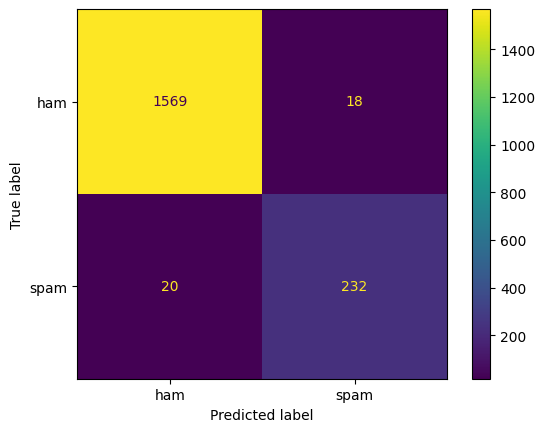

In [32]:
ConfusionMatrixDisplay.from_estimator(clf, 
                      X_test, 
                      y_test, 
                      display_labels=["ham", "spam"])

In [11]:
from sklearn.metrics import roc_curve, auc # Draw ROC Curve and compute AUC (Area Under Curve)
from matplotlib import pyplot as plt

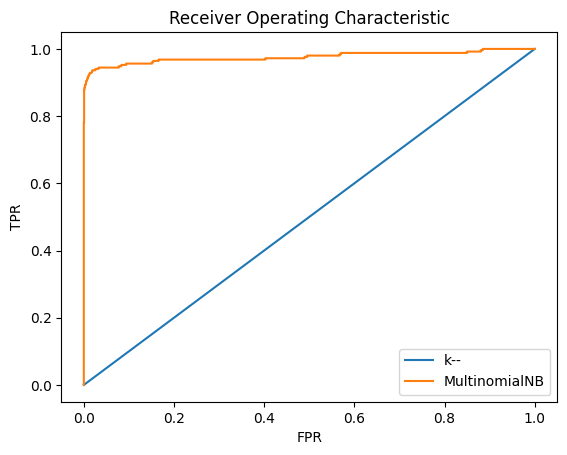

Area under Roc Curve for MultinomialNB:  0.976


In [28]:
fpr , tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1], pos_label='spam')

plt.plot([0,1],[0,1], label='k--')
plt.plot(fpr, tpr, label= "MultinomialNB")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

print("Area under Roc Curve for MultinomialNB: ", "%.3f" % auc(fpr, tpr))

#### The auc of the model looks higher (0.976) which shows a good predicition properties for the trained model.

#### Now, let's test the model by taking as an input a user message and determine wether it's a spam or not.

In [39]:
sample = input('Enter a message :')    #Enter a message:You won $40 cash price
data = cv.transform([sample]).toarray()
print(clf.predict(data))

['spam']
